# 1. Import một số thư viện cần thiết

In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [3]:
MSN = pd.read_csv("MSN.csv")

In [4]:
MSN

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"89,000","89,000","89,200","88,200",683.44K,0.11%
1,3/4/2019,"89,500","89,100","91,400","89,000",1.28M,0.56%
2,3/5/2019,"89,400","89,500","90,900","89,300",772.09K,-0.11%
3,3/6/2019,"90,000","90,000","90,200","89,300",695.52K,0.67%
4,3/7/2019,"90,000","90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,5/29/2024,"75,000","75,700","76,900","75,000",8.00M,-0.66%
1311,5/30/2024,"77,200","74,300","77,400","74,100",11.16M,2.93%
1312,5/31/2024,"76,600","78,000","78,400","76,600",5.59M,-0.78%
1313,6/3/2024,"77,700","77,300","78,500","76,800",6.57M,1.44%


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [5]:
# Drop missing values
MSN = MSN.dropna()
MSN["Price"] = MSN["Price"].str.replace(',', '').astype(float)
# Reset the index
MSN = MSN.reset_index(drop=True)

# 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

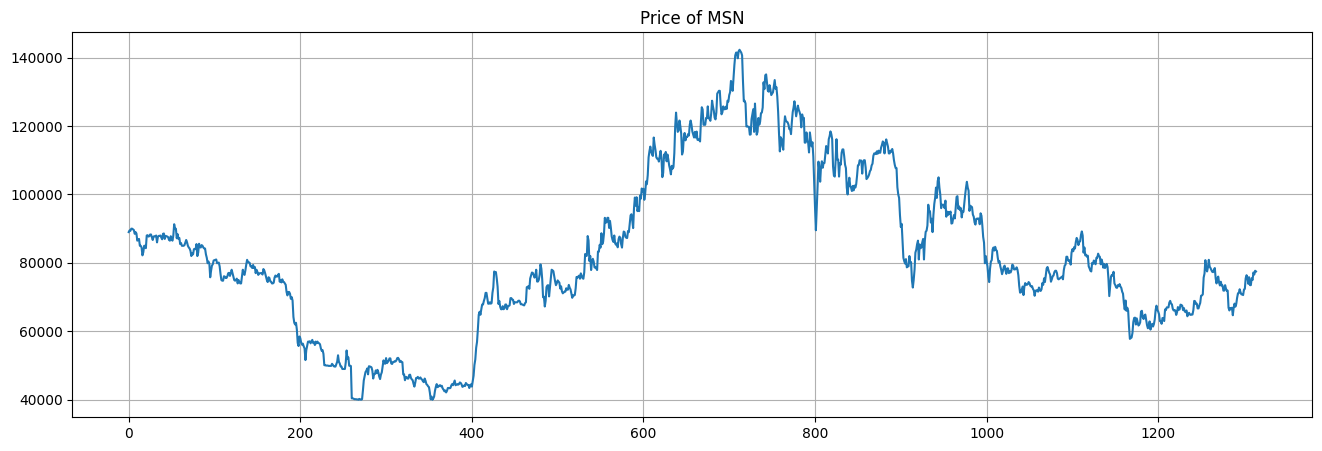

In [6]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(MSN["Price"])
plt.title('Price of MSN')
plt.grid(True)
plt.show()

# 4. Chia tập dữ liệu để train-test-validation theo tỉ lệ 7:2:1

In [7]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(MSN))
test_size = int(0.2 * len(MSN))
val_size = len(MSN) - train_size - test_size

In [8]:
train_data = MSN[:train_size]
test_data = MSN[train_size:train_size+test_size]
val_data = MSN[train_size+test_size:]

<h1> Quá trình training

In [9]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [10]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validation

In [11]:
#validation data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [12]:
#Tạo index cho 30,60,90 ngày tiếp theo
last_index =  MSN.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)

#Tạo một mảng gồm 30,60,90 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30,60,90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


<h1>Đánh giá độ chính xác của thuật toán

In [13]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 65022.96237283286
Testing RMSE: 42749.95673333149


In [14]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 64911.7122266914
Testing MAE: 40337.08270323881


In [15]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 94.4021889837637
Testing MAPE: 52.45976207714852


<h1>Vẽ hình mô tả dự đoán

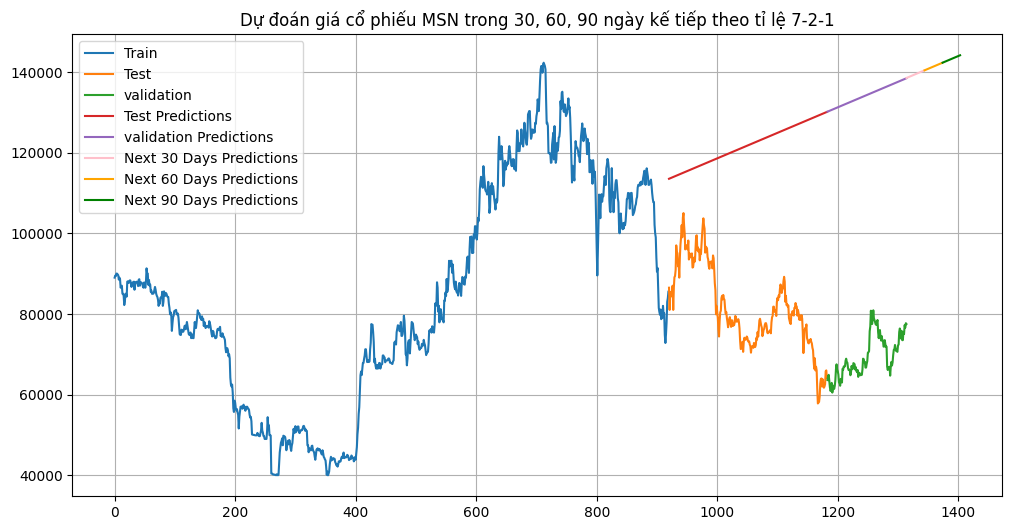

In [16]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.title("Dự đoán giá cổ phiếu MSN trong 30, 60, 90 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data_30, y_next_30_days, color="pink")
plt.plot(last_data_60, y_next_60_days, color="orange")
plt.plot(last_data_90, y_next_90_days, color="green")
plt.legend(['Train', 'Test', 'validation', 'Test Predictions', 'validation Predictions', 'Next 30 Days Predictions', 'Next 60 Days Predictions', 'Next 90 Days Predictions'])
plt.show()

# 5. Chia tập dữ liệu để train-test-validation theo tỉ lệ 6:3:1

In [17]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(MSN))
test_size = int(0.3 * len(MSN))
val_size = len(MSN) - train_size - test_size

In [18]:
train_data = MSN[:train_size]
test_data = MSN[train_size:train_size+test_size]
val_data = MSN[train_size+test_size:]

<h1>Quá trình training

In [19]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1>Quá trình testing

In [20]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validation

In [21]:
#validation data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [22]:
#Tạo index cho 30,60,90 ngày tiếp theo
last_index =  MSN.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)

#Tạo một mảng gồm 30,60,90 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30,60,90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

<h1>Đánh giá độ chính xác của thuật toán

In [23]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 72319.7914161853
Testing RMSE: 40584.33158581881


In [24]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 72224.05379833865
Testing MAE: 34234.69515963369


In [25]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 104.9752651543719
Testing MAPE: 43.6981861222678


<h1>Vẽ hình mô tả dự đoán

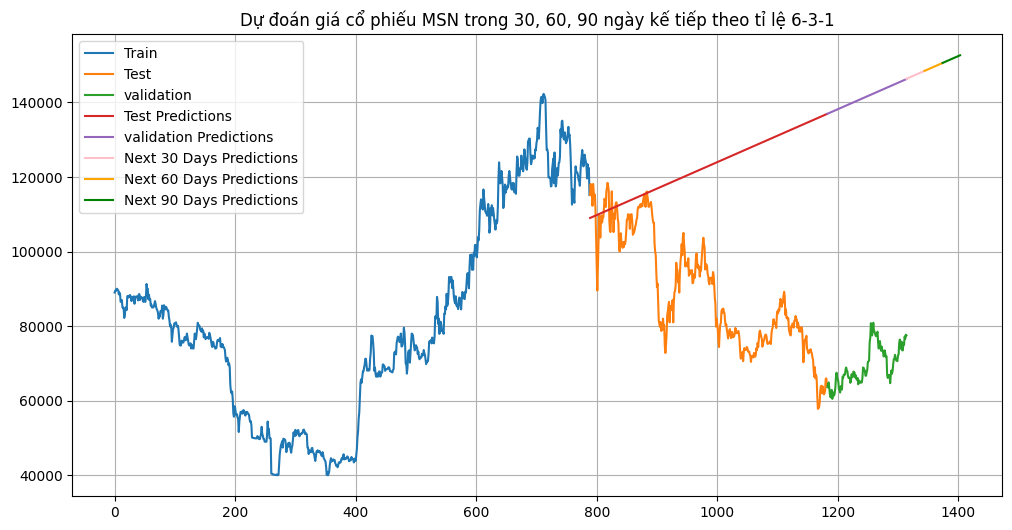

In [26]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.title("Dự đoán giá cổ phiếu MSN trong 30, 60, 90 ngày kế tiếp theo tỉ lệ 6-3-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data_30, y_next_30_days, color="pink")
plt.plot(last_data_60, y_next_60_days, color="orange")
plt.plot(last_data_90, y_next_90_days, color="green")
plt.legend(['Train', 'Test', 'validation', 'Test Predictions', 'validation Predictions', 'Next 30 Days Predictions', 'Next 60 Days Predictions', 'Next 90 Days Predictions'])
plt.show()

# 6. Chia tập dữ liệu để train-test-validation theo tỉ lệ 5:3:2

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(MSN))
test_size = int(0.3 * len(MSN))
val_size = len(MSN) - train_size - test_size

In [28]:
train_data = MSN[:train_size]
test_data = MSN[train_size:train_size+test_size]
val_data = MSN[train_size+test_size:]

<h1> Quá trình training

In [29]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [30]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validation

In [31]:
#validation data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [32]:
#Tạo index cho 30,60,90 ngày tiếp theo
last_index =  MSN.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)

#Tạo một mảng gồm 30,60,90 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30,60,90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

<h1>Đánh giá độ chính xác của thuật toán

In [33]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 22889.45292883127
Testing RMSE: 28972.10131396934


In [34]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 21535.676692993504
Testing MAE: 24397.198678420704


In [35]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 30.995770536413055
Testing MAPE: 21.45962112695257


<h1>Vẽ hình mô tả dự đoán

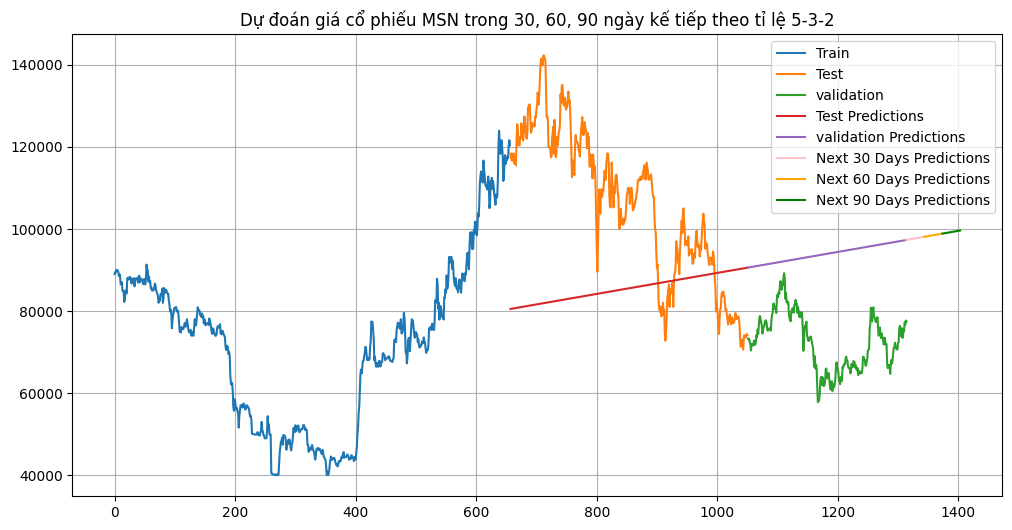

In [36]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.title("Dự đoán giá cổ phiếu MSN trong 30, 60, 90 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data_30, y_next_30_days, color="pink")
plt.plot(last_data_60, y_next_60_days, color="orange")
plt.plot(last_data_90, y_next_90_days, color="green")
plt.legend(['Train', 'Test', 'validation', 'Test Predictions', 'validation Predictions', 'Next 30 Days Predictions', 'Next 60 Days Predictions', 'Next 90 Days Predictions'])
plt.show()